<a href="https://colab.research.google.com/github/Santiago-Quinteros/SQLAlchemy-Tutorial-With-Examples/blob/main/SQLAlchemy_Tutorial_With_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQLAlchemy Tutorial With Examples

A tutorial to remember SQL and SQLAlchemy

ChatGPT

https://www.datacamp.com/tutorial/sqlalchemy-tutorial-examples

https://sqlzoo.net/wiki/SQL_Tutorial



## What is SQLAlchemy?
SQLAlchemy is a Python library that helps you work with databases. It provides:

A Core layer for building raw SQL queries in Python.

An ORM (Object Relational Mapping) layer that lets you interact with database tables as if they were Python objects.

## Key Concepts
Database: A collection of data organized into tables.

Table: Similar to a spreadsheet, it contains rows and columns.

Row: A single record.

Column: A property of the record (e.g., name, age).

Engine: Connects to the database.

Session: Manages communication with the database.

## Key Points About Queries:

Queries are instructions to interact with the database.

In SQLAlchemy, they are abstracted into Python objects and executed through a connection/session.

Common query types include SELECT (retrieve), INSERT (add), UPDATE (modify), and DELETE (remove).

In [6]:
pip install sqlalchemy

In [7]:
import sqlalchemy
sqlalchemy.__version__

'2.0.36'

In [8]:
import sqlalchemy as db
#Download and place in working folder
#https://www.kaggle.com/datasets/groleo/european-football-database?resource=download
engine = db.create_engine("sqlite:///european_database.sqlite")
conn = engine.connect()

What is an Engine?

The engine in SQLAlchemy is the core component responsible for connecting your Python application to a database. It's like the "bridge" between Python and the actual database.

Key Responsibilities of the Engine

* Establish Connection: The engine knows how to talk to your database (e.g., SQLite, PostgreSQL, MySQL).

* Execute Queries: It runs queries against the database.

* Manage Resources: It handles database connections efficiently.


In [9]:
# Use the inspector to get the list of tables
inspector = db.inspect(engine)

# Get the names of all tables in the database
table_names = inspector.get_table_names()

# Print the table names
print(table_names)

['divisions', 'matchs']


In [10]:
metadata = db.MetaData() #extracting the metadata (what is the data, type for example)
#metadata is an object that contains all the metadata from the tables
division= db.Table('divisions', metadata, autoload_with=engine) #Table object

In [11]:
print(repr(metadata.tables['divisions']))

Table('divisions', MetaData(), Column('division', TEXT(), table=<divisions>), Column('name', TEXT(), table=<divisions>), Column('country', TEXT(), table=<divisions>), schema=None)


In [12]:
print(division.columns.keys())

['division', 'name', 'country']


In [13]:
query=division.select() #Make a select query
print(query)

SELECT divisions.division, divisions.name, divisions.country 
FROM divisions


In [22]:
# the queries are executed from the connection

exe = conn.execute(query) #executing the query
result = exe.fetchmany(15) #extracting top 5 results
print(len(result))
print(len(exe.fetchall())) #Exctracts all but as I already extracted 15 it just gets the last 6

#['division', 'name', 'country']

15
6


# Creating Tables

First, we will create a new database called datacamp.sqlite. The create_engine will create a new database automatically if there is no database with the same name. So, creating and connecting are pretty much similar.

After that, we will connect the database and create a metadata object.

We will use SQLAlchmys Table function to create a table called “Student”

It consists of columns:

Id: Integer and primary key

Name: String and non-nullable

Major: String and default = “Math”

Pass: Boolean and default =True

We have created the structure of the table. Lets add it to the database using `metadata.create_all(engine)`.

In [53]:
engine = db.create_engine('sqlite:///datacamp.sqlite')
conn = engine.connect()
metadata = db.MetaData()

Student = db.Table('Student', metadata, #Metadata= name, type, default, you use it to create tables with no data yet added
                   db.Column('Id',db.Integer(), primary_key=True), #Primary key indicates that it is the one that numbers the rows
                   db.Column('Name', db.String(255), nullable=False),
                   db.Column('Major', db.String(255), default='Math'),
                   db.Column('Pass', db.Boolean(), default =True)
                   )
metadata.create_all(engine)

In [54]:
inspector = db.inspect(engine)
table_names = inspector.get_table_names()
print(table_names)
print(repr(metadata.tables['Student']))
print(Student.columns.keys())

['Student']
Table('Student', MetaData(), Column('Id', Integer(), table=<Student>, primary_key=True, nullable=False), Column('Name', String(length=255), table=<Student>, nullable=False), Column('Major', String(length=255), table=<Student>, default=ScalarElementColumnDefault('Math')), Column('Pass', Boolean(), table=<Student>, default=ScalarElementColumnDefault(True)), schema=None)
['Id', 'Name', 'Major', 'Pass']


In [55]:
#SELECT
#INSERT
#UPDATE
#DELETE

query = db.insert(Student).values(Id=1,Name='Santiago',Major="French")
Result=conn.execute(query)

In [56]:
output=conn.execute(Student.select()).fetchall()
print(output)

[(1, 'Santiago', 'French', True)]


In [58]:
query=db.insert(Student) # The insert query expects me to give a list with the elements I want to submit, as a dictionary
values_list = [ {'Id':4,"Name":"Maelle","Major":"Spanish","Pass":True},
                {'Id':5,"Name":"Pepe","Major":"portuguese","Pass":False},
               ]
Result= conn.execute(query,values_list)

In [59]:
output=conn.execute(Student.select()).fetchall() #select is a method from the table Student object
print(output)

[(1, 'Santiago', 'French', True), (4, 'Maelle', 'Spanish', True), (5, 'Pepe', 'portuguese', False)]


Simple SQL Query with SQLAlchemy

Instead of using Python objects, we can also execute SQL queries using String.

Just add the argument as a String to the execute() function and view the result using fetchall().

ITS NOT THE IDEA THO

In [64]:
output = conn.execute(db.text("SELECT * FROM Student")) #* means everything
print(output.fetchall())

[(1, 'Santiago', 'French', 1), (4, 'Maelle', 'Spanish', 1), (5, 'Pepe', 'portuguese', 0)]


More complex querys can be passd

In [71]:
output= conn.execute(db.text("SELECT Name, Major FROM Student WHERE Pass = True"))
print(output.fetchall())

[('Santiago', 'French'), ('Maelle', 'Spanish')]


In [89]:
query = db.delete(Student).where(Student.c.Id==1) # c=columns
Result=conn.execute(query)
query = db.delete(Student).where(Student.c.Name=="Maelle")
Result=conn.execute(query)
output=conn.execute(Student.select()).fetchall()
print(output)
query = db.insert(Student).values(Id=1,Name='Santiago',Major="French")
Result=conn.execute(query)
query = db.insert(Student).values(Id=4,Name='Maelle',Major="Spanish")
Result=conn.execute(query)
output=conn.execute(Student.select()).fetchall()
print(output)
query = db.update(Student).where(Student.c.Id==5).values(Major="Spanish")
Result=conn.execute(query)
output=conn.execute(Student.select()).fetchall()
print(output)

[(5, 'Pepe', 'Spanish', False)]
[(1, 'Santiago', 'French', True), (4, 'Maelle', 'Spanish', True), (5, 'Pepe', 'Spanish', False)]
[(1, 'Santiago', 'French', True), (4, 'Maelle', 'Spanish', True), (5, 'Pepe', 'Spanish', False)]


More complex, multi-step queries

AND, WHERE, and many more!

In [93]:
#Select only the tudents whose major is spanish and failed

query = Student.select().where(db.and_(Student.columns.Major=="Spanish",Student.c.Pass!=False))
output = conn.execute(query)
print(output.fetchall())


[(4, 'Maelle', 'Spanish', True)]


In [96]:
query = Student.select().where(Student.c.Major.in_(['French','Spanish']))
output = conn.execute(query)
results = output.fetchall()
print(results)

[(1, 'Santiago', 'French', True), (4, 'Maelle', 'Spanish', True), (5, 'Pepe', 'Spanish', False)]


In [103]:
import pandas as pd
data=pd.DataFrame(results)
#print(results[0].keys())
#data.columns=
data

,Id,Name,Major,Pass
0,1,Santiago,French,True
1,4,Maelle,Spanish,True
2,5,Pepe,Spanish,False


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Id'].plot(kind='hist', bins=20, title='Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Major').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Pass').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Major')):
  _plot_series(series, series_name, i)
  fig.legend(title='Major', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Pass')):
  _plot_series(series, series_name, i)
  fig.legend(title='Pass', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Id'}, axis=1)
              .sort_values('Id', ascending=True))
  xs = counted['Id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Id'].plot(kind='line', figsize=(8, 4), title='Id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Major'].value_counts()
    for x_label, grp in _df_12.groupby('Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Name')
_ = plt.ylabel('Major')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Pass'].value_counts()
    for x_label, grp in _df_13.groupby('Major')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Major')
_ = plt.ylabel('Pass')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='index', y='Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Major'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='index', y='Major', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Pass'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='Pass', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Id', y='Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

#Up

# Data analytics with SQLAlchemy

## Connecting two tables

We will connect the matches to the divisions using the div present in both tables

In [104]:
engine = db.create_engine("sqlite:///european_database.sqlite")
conn = engine.connect()
metadata= db.MetaData()
division=db.Table('divisions',metadata,autoload_with=engine) #Autoload takes directly from engine the tables named
match = db.Table('matchs',metadata,autoload_with=engine)

In [119]:
query = match.select()
output=conn.execute(query)
results=output.fetchall()
data=pd.DataFrame(results)
# data.columns=results[0].keys()
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season
0,B1,2020-08-08,Club Brugge,Charleroi,0.0,1.0,A,2021
1,B1,2020-08-08,Antwerp,Mouscron,1.0,1.0,D,2021
2,B1,2020-08-08,Standard,Cercle Brugge,1.0,0.0,H,2021
3,B1,2020-08-09,St Truiden,Gent,2.0,1.0,H,2021
4,B1,2020-08-09,Waregem,Genk,1.0,2.0,A,2021
...,...,...,...,...,...,...,...,...
123399,T1,2006-05-14,Galatasaray,Kayserispor,3.0,0.0,H,2006
123400,T1,2006-05-14,Gaziantepspor,Malatyaspor,1.0,0.0,H,2006
123401,T1,2006-05-14,Genclerbirligi,Rizespor,1.0,3.0,A,2006
123402,T1,2006-05-14,Samsunspor,Diyarbakirspor,1.0,0.0,H,2006


In [120]:
query = division.select()
output=conn.execute(query)
results=output.fetchall()
data=pd.DataFrame(results)
# data.columns=results[0].keys()
data

,division,name,country
0,B1,Division 1A,Belgium
1,D1,Bundesliga,Deutschland
2,D2,2. Bundesliga,Deutschland
3,E0,Premier League,England
4,E1,EFL Championship,England
5,E2,EFL League One,England
6,E3,EFL League Two,England
7,EC,National League,England
8,F1,Ligue 1,France
9,F2,Ligue 2,France


In [128]:
# We will select both division and match columns.
query=(db.select(division,match)
    # Join them using a common column: division.division and match.Div.
    .select_from(division.join(match,division.c.division== match.c.Div))
    # Select all columns where the division is E1 and the season is 2009.
    .where(db.and_(division.columns.division =="E1", match.c.season ==2009))
    # Order the result by HomeTeam.
    .order_by(match.columns.HomeTeam)
    )
output= conn.execute(query)
results=output.fetchall()
data=pd.DataFrame(results)
data

#Each element that had the value E1 in key Div now has assigned also the name and country of the division

,division,name,country,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season
0,E1,EFL Championship,England,E1,2008-08-16,Barnsley,Coventry,1.0,2.0,A,2009
1,E1,EFL Championship,England,E1,2008-08-30,Barnsley,Derby,2.0,0.0,H,2009
2,E1,EFL Championship,England,E1,2008-09-16,Barnsley,Cardiff,0.0,1.0,A,2009
3,E1,EFL Championship,England,E1,2008-09-27,Barnsley,Norwich,0.0,0.0,D,2009
4,E1,EFL Championship,England,E1,2008-10-04,Barnsley,Doncaster,4.0,1.0,H,2009
...,...,...,...,...,...,...,...,...,...,...,...
547,E1,EFL Championship,England,E1,2009-03-10,Wolves,Ipswich,0.0,0.0,D,2009
548,E1,EFL Championship,England,E1,2009-03-14,Wolves,Charlton,2.0,1.0,H,2009
549,E1,EFL Championship,England,E1,2009-04-10,Wolves,Southampton,3.0,0.0,H,2009
550,E1,EFL Championship,England,E1,2009-04-18,Wolves,QPR,1.0,0.0,H,2009


# Data Visualization

Now that we have the specific data we wanted we can show it in many ways

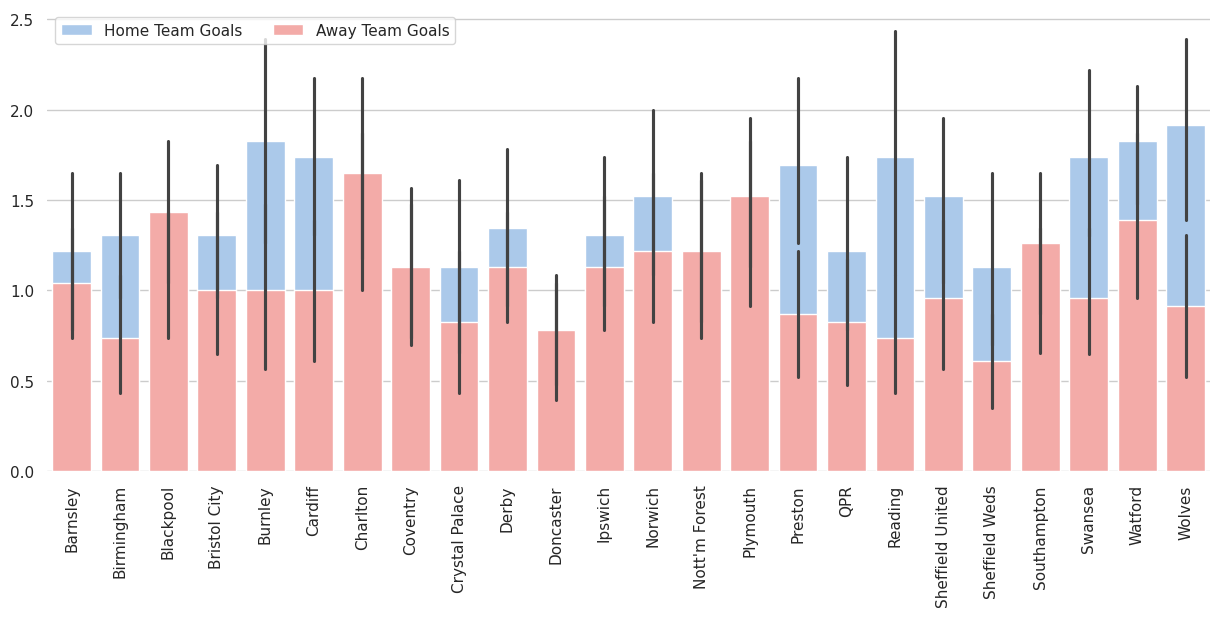

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation=90)
sns.set_color_codes("pastel")
sns.barplot(x="HomeTeam", y="FTHG", data=data,
            label="Home Team Goals", color="b")

sns.barplot(x="HomeTeam", y="FTAG", data=data,
            label="Away Team Goals", color="r")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(ylabel="", xlabel="")
sns.despine(left=True, bottom=True)

In [131]:
# Saving results to CSV

output = conn.execute(db.text("SELECT * FROM matchs WHERE HomeTeam LIKE 'Norwich'"))
results = output.fetchall()


data = pd.DataFrame(results)
data.to_csv("SQl_result.csv",index=False)

In [138]:
# CSV file to SQL table

engine = db.create_engine("sqlite:///datacamp2.sqlite")
df = pd.read_csv('SQl_result.csv')
df.to_sql(con=engine, name="Important_Matches", if_exists='replace', index=False)
conn = engine.connect()
metadata = db.MetaData()
stock = db.Table('Important_Matches', metadata, autoload_with=engine)

In [139]:
query = stock.select()
exe = conn.execute(query)
result = exe.fetchmany(5)
for r in result:
    print(r)

('E1', '2020-09-19', 'Norwich', 'Preston', 2.0, 2.0, 'D', 2021)
('E1', '2020-10-03', 'Norwich', 'Derby', 0.0, 1.0, 'A', 2021)
('E1', '2020-10-20', 'Norwich', 'Birmingham', 1.0, 0.0, 'H', 2021)
('E1', '2020-10-24', 'Norwich', 'Wycombe', 2.0, 1.0, 'H', 2021)
('E1', '2020-11-03', 'Norwich', 'Millwall', 0.0, 0.0, 'D', 2021)
